# **Project Name**    - 

$\color{red}{\text{Hotel Booking Analysis}}$


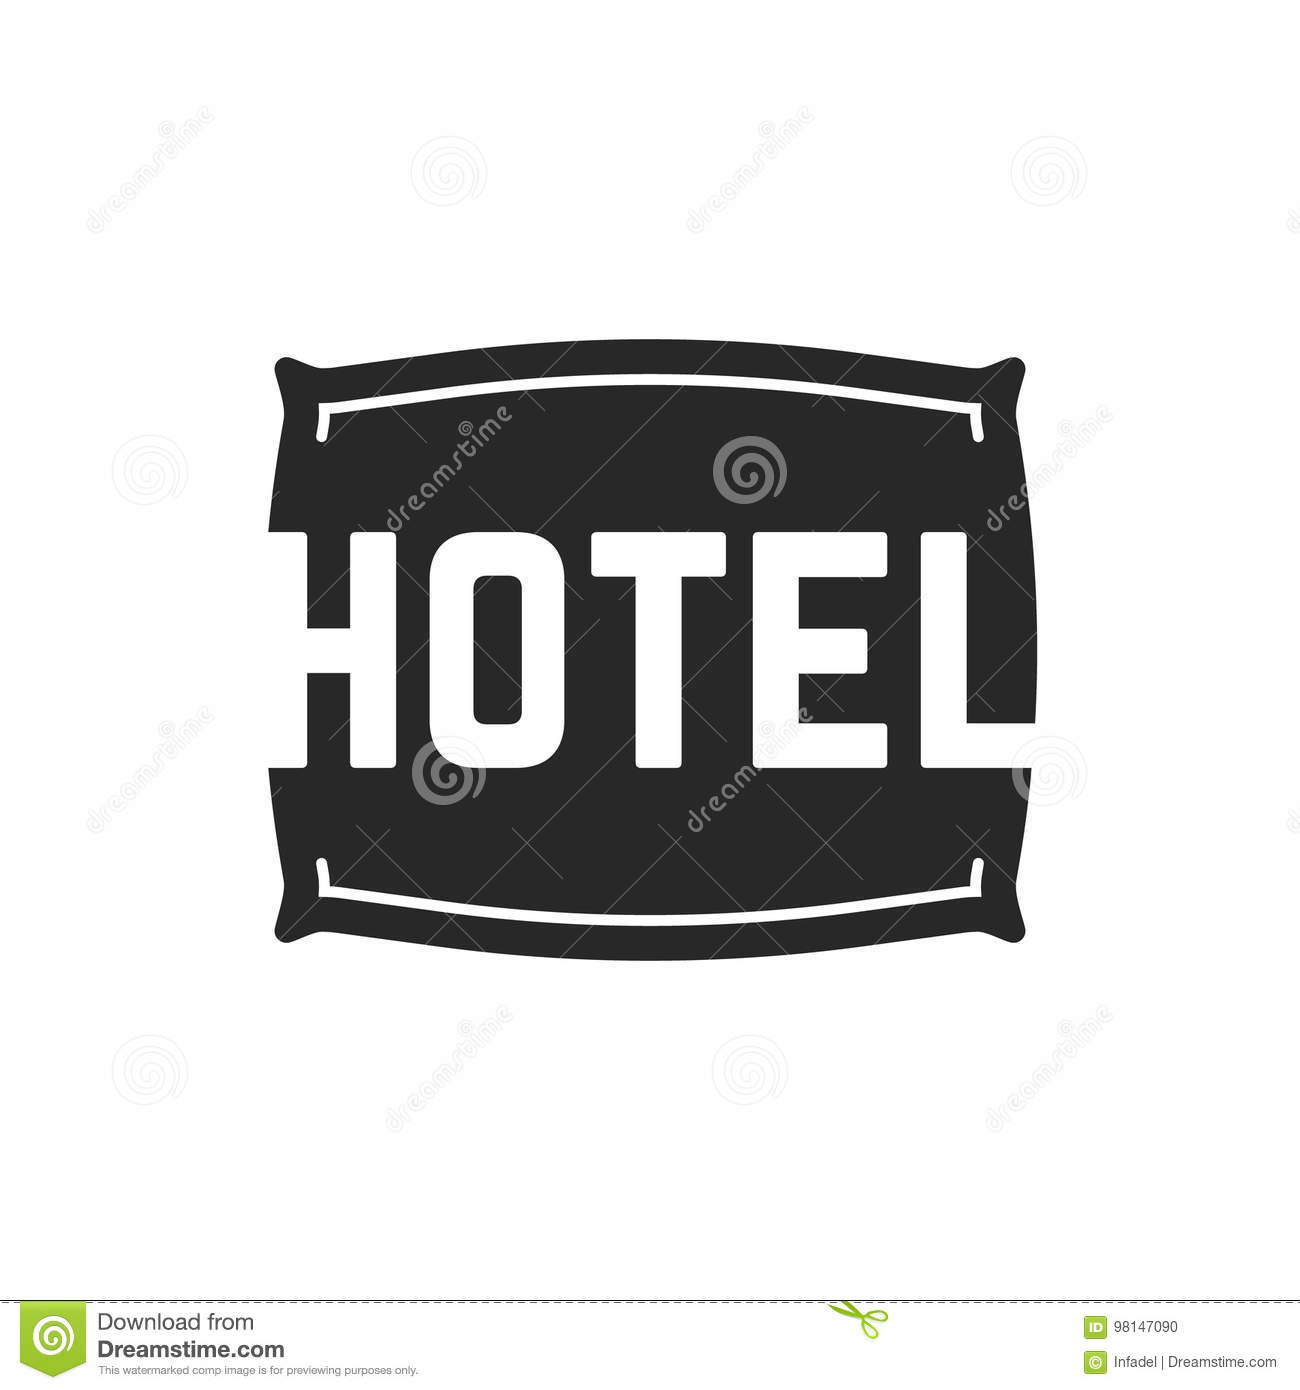

##### **Project Type**    - Python for Data Science
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{red}{\text{Raju Vatsavai}}$


#Problem Statement

#Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
#This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
#Explore and analyze the data to discover important factors that govern the bookings.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

#CSV file location

In [2]:
#Drive Mounted
#CSV file location
file_path = '/content/drive/MyDrive/Colab Notebooks/Python/Capstone Project- py for DS/Hotel Bookings.csv'

#Read CSV

In [ ]:
#reading CSV
df = pd.read_csv(file_path)

#Data Exploration

In [ ]:
#checking shape of the dataset
print(f'We have total {df.shape[0]} rows and {df.shape[1]} columns')

In [ ]:
#Checking first five rows of data
df.head(5)

In [ ]:
#checking last five rows of data
df.tail(5)

In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

In [ ]:
#looking for the data types non null entries
df.info()

#Data Description

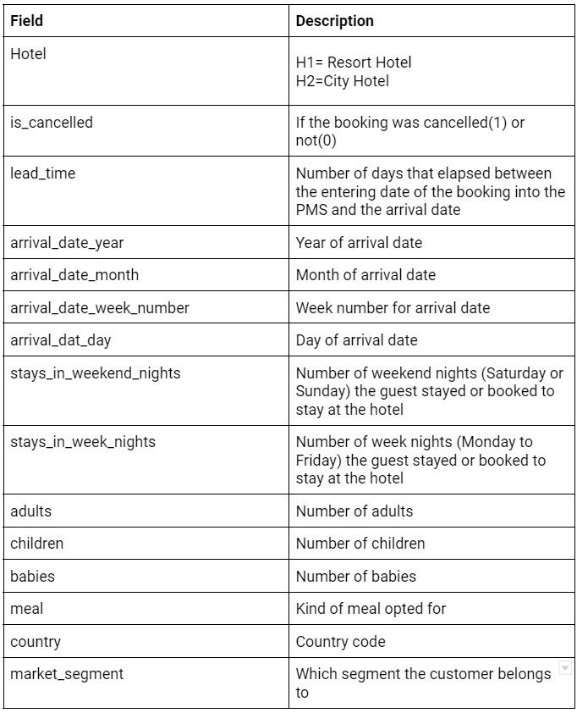

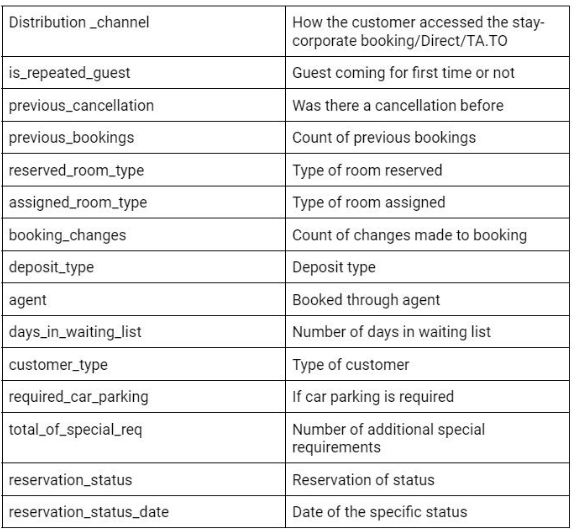

In [ ]:
# creating a copy of our dataset
df1 = df.copy()

In [ ]:
# columns name list
print(list(df1.columns))

In [ ]:
#checking type of column "reservation_status_date"
type(df1['reservation_status_date'])

In [ ]:
# converting object type to datetime
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
df1.info()

#Data Cleaning

In [ ]:
#checking for duplicate rows
df1.duplicated().value_counts() #True means duplicate rows

In [ ]:
# Visulizing through Count plot
plt.figure(figsize = (10,8))
sns.countplot( x = df1.duplicated())

So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [ ]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

In [ ]:
#checking shape after removing duplicates
df1.shape

In [ ]:
#checking for null values
df1.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns = {'index':'columns',0:'Null values'})

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(30,7))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.xlabel('Name Of Columns')
plt.title('Places of missing values in column')

So we Have Null values in columns- Company, agent, Country,children.


1.   for company and agent I will fill the Missing values with 0
2.   for country I will fill Missing values with object 'Others'. ( assuming  while collecting data country was not found so user selected the 'Others' option.)
3. AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens

In [ ]:
## Filling/replacing null values with 0.
null_columns = ['company','agent','children']
for col in null_columns:
  df1[col].fillna(0,inplace=True)

#Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)

In [ ]:
#Now lets check column information
df1.info()

In [ ]:
df1.head(20)

In [ ]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [ ]:
df1.shape

In [ ]:
set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)

In [ ]:
set(df1.describe())

In [ ]:
set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns) - set(df1.describe())

In [ ]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

In [ ]:
# lets add some new columns
df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']  

In [ ]:
#Now lets check shape of dataset
df1.shape

In [ ]:
df1.head()

#EDA(exploratory data analysis)

##univariate analysis

##1)which type of hotel preferred mostly by guests?

In [ ]:
df1['hotel'].value_counts().plot.pie(autopct='%1.1f%%',figsize =(8,8),explode=[0.02, 0.02],fontsize = 20)
plt.title('Pie Chart for most preferred guests')

###Observation:
City Hotel is most preferred hotel by guests,it means city hotel has maximum bookings

##2) Which Agent made the most bookings?

In [ ]:
highest_bookings_by_agent = df1['agent'].value_counts().reset_index().rename(columns ={'index':'agent','agent':'most_bookings'}).sort_values(by='most_bookings',ascending = False)
highest_bookings_by_agent.drop(highest_bookings_by_agent[highest_bookings_by_agent['agent']==0].index, inplace = True)
Top_ten_bookings = highest_bookings_by_agent[:10]
Top_ten_bookings

In [ ]:
#visualising the graph
plt.figure(figsize = (18,8))
sns.barplot(x = Top_ten_bookings['agent'], y = Top_ten_bookings['most_bookings'],order = Top_ten_bookings['agent'])
plt.xlabel('agent')
plt.ylabel('most_bookings')
plt.title('Most bookings made by an agents')

##Observation
Agent ID no: 9 made most of the bookings

#3)What is the pecentage of cancellation?

In [ ]:
df1['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',figsize =(8,8),explode=[0.02, 0.02],fontsize = 20)
plt.title("Cancellation and non Cancellation")

##Observation :
0= not cancelled,
1= cancelled,
27.5 % of the bookings were cancelled.

#4) What is the Percentage of repeated guests?


In [ ]:
df1['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%',figsize =(8,8),explode=[0.02, 0.02],fontsize = 20)
plt.title('percentage of repeated guests')

##Observation:
Repeated guests are very few which only 3.9 %.
In order to retained the guests management should take feedbacks from guests and try to imporve the services.

#5) What is the percentage distribution of "Customer Type"?

In [ ]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels = None)
labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85,1),loc = 'upper left',labels = labels)

1. Contract

when the booking has an allotment or other type of contract associated to it

2. Group

when the booking is associated to a group

3. Transient

when the booking is not part of a group or contract, and is not associated to other transient booking

4. Transient-party

when the booking is transient, but is associated to at least other transient booking

##Observation:
Transient customer type is more which is 82.4 %. percentage of Booking associated by the Group is vey low.

#6)What is the percentage distribution of required_car_parking_spaces?

In [ ]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5,figsize =(10,8),shadow = False,autopct='%1.1f%%',fontsize=15,labels = None)
plt.title('% distribution of required car parking spaces')
labels = df1['required_car_parking_spaces'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85,1),loc = 'upper left',labels = labels)

##Observation
91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

#7)What is the percentage of booking changes made by the customer.?

In [ ]:
booking_changes_df = df1['booking_changes'].value_counts().reset_index().rename(columns = {'index':'number_booking_changes','booking_changes':'counts'})
booking_changes_df
plt.figure(figsize = (18,8))
sns.barplot(x = booking_changes_df['number_booking_changes'], y = booking_changes_df['counts']*100/df1.shape[0] , order = booking_changes_df['number_booking_changes'])

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

### **Observation**
### Almost 82% of the bookings were not changed by guests.


#8)What is Percentage distribution of Deposite type ?

In [ ]:
df1['deposit_type'].value_counts().plot.pie(explode=[0.5,0.5,0.05],figsize =(10,8),shadow = False,autopct='%1.1f%%',fontsize=15,labels = None)
plt.title('Percentage distribution of Deposite type')
labels = df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.8, 1),labels = labels,loc = 'upper left')

### **Observation**
### 98.7 % of the guests prefer "No deposit" type of deposit.

#9) Which type of food is mostly preferred by the guests?

In [ ]:
# df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize = (10,8))
sns.countplot(x = df1['meal'])
plt.xlabel('Meal type')
plt.ylabel('count')
plt.title('Preferred Meal Type')

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
### **Observation**
### * So the most preferred meal type by the guests is BB( Bed and Breakfast) 
### * HB- (Half Board) and SC- (Self Catering) are equally preferred.


#10) From which country the most guests are coming?

In [ ]:
country_df = df1['country'].value_counts().reset_index().rename(columns = {'index':'country','country':'count of guests'})[:10]
plt.figure(figsize = (18,8))
sns.barplot(x = country_df['country'], y = country_df['count of guests'] )
plt.xlabel('country')
plt.ylabel('count of guests')
plt.title('Number Of Guests Coming From Different Countries')

In [ ]:
#alternate way of doing above problem
import folium
import plotly.express as px

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count of guests'], hover_name = country_df['country'])
guests_map.show()

### **Observation**
### Most of the guests are coming from portugal i.e more 25000 guests are from portugal
abbreevations for countries-



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





#11) Which is the most preferred room type by the customers?

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot( x = df1['assigned_room_type'], order = df1['assigned_room_type'].value_counts().index )
plt.xlabel('Room Type')
plt.ylabel('Count of Room Type')
plt.title("Most preferred Room type")

### **Observation**
###So the most preferred Room type is "A".

#12)In which month most of the bookings happened?

In [ ]:
# df1['arrival_date_month'].value_counts().sort_values().reset_index()

In [ ]:
# df1.groupby('arrival_date_month')['hotel'].count().sort_values().reset_index()

In [ ]:
# bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().sort_values().reset_index().rename(columns={'hotel':"Counts"})
# plt.figure(figsize = (18,8))
# sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['Counts'])

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

In [ ]:
plt.figure(figsize = (18,8))
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['Counts'])
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

 ### **Observation**
 July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

#13.Which Distribution channel is mostly used for hotel bookings?

In [ ]:
#creating df for channel distribution
distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
#plotting the pie chart for 'distribution channel'
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)
#labels converting to list
labels = df1['distribution_channel'].value_counts().index.tolist()

distribution_channel_df['percentage'] = round(distribution_channel_df['count']*100/df1.shape[0],1)
#percentages converting to list
sizes = distribution_channel_df['percentage'].values.tolist()
#for loop ie list comprehension to print both labels and sizes 
labels = [f'{l},{s}%' for l,s in zip(labels,sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left',labels = labels)
plt.title('Mostly Used Distribution Channel for Hotel Bookings')

###**Observation**:
###'TA/TO' is mostly(79.1%) used for booking hotels.

#14.Which year had the highest bookings?

In [ ]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

### **Observation**
###2016 had the higest bookings.
###2015 had less 7000 bookings.
###overall City hotels had the most of the bookings.

# Bivariate and Multivariate Analysis

#1) Which Hotel type has  the highest ADR?

In [ ]:
df1[['hotel','adr']].reset_index()

In [ ]:
grp_by_hotel = df1.groupby('hotel')['adr'].mean().reset_index()

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = grp_by_hotel['hotel'], y = grp_by_hotel['adr'] )
plt.xlabel('Type Of Hotel')
plt.ylabel('ADR')
plt.title('Hotel with highest ADR')

### **Observation**
### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# 2) Which hotel type has the more lead time?

In [ ]:
lead_time = df1.groupby('hotel')['lead_time'].mean().reset_index()
lead_time

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot( x = lead_time['hotel'], y = lead_time['lead_time'])
plt.xlabel('Type Of Hotel')
plt.ylabel('Lead Time')
plt.title('Hotel with more lead time')

###**Observation**
###Resort hotels has slightly  high avg lead time. That means customers plan their trips very early. 

#3) Which hotel has highest percentage of booking cancellation?

In [ ]:
cancelled_df= df1[df1['is_canceled']==1]
cancelled_df

In [ ]:
cancelled_df = cancelled_df.groupby('hotel')['is_canceled'].size().reset_index()
cancelled_df

In [ ]:
cancelled_df['total_bookings'] = df1.groupby('hotel').size().reset_index().drop('hotel',axis = 1)

In [ ]:
cancelled_df

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot( x = cancelled_df['hotel'], y = cancelled_df['is_canceled']*100/cancelled_df['total_bookings'])
plt.xlabel('Type Of Hotel')
plt.ylabel('% of cancellations')
plt.title('Hotel with cancellation percentage')

##observation
City Hotel has highest percentage of booking cancellation

#4)Which hotel has longer waiting time?

In [ ]:
longer_wait = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
longer_wait
plt.figure(figsize = (10,8))
sns.barplot( x = longer_wait['hotel'], y = longer_wait['days_in_waiting_list'])
plt.xlabel('Type Of Hotel')
plt.ylabel('avg longer waiting')
plt.title('Hotel has longer waiting time')

###**Observation**
### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

# 5) Which Hotels has the most repeated guests?

In [ ]:
df1['is_repeated_guest']

In [ ]:
repeated_guest = df1[df1['is_repeated_guest']==1].groupby('hotel')['is_repeated_guest'].size().reset_index()
repeated_guest

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guest['hotel'],y=repeated_guest['is_repeated_guest'])
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

#**Observation**
###Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

ADR across different months

In [ ]:
df1.columns

In [ ]:
booking_by_months = df1.groupby(['hotel','arrival_date_month'])['adr'].mean().reset_index()
booking_by_months

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
# it will take the order of the month list in the df along with values
booking_by_months ['arrival_date_month'] = pd.Categorical(booking_by_months ['arrival_date_month'], categories = months, ordered = True)
booking_by_months

In [ ]:
booking_by_months = booking_by_months.sort_values('arrival_date_month')
booking_by_months

In [ ]:
plt.figure(figsize = (18,8))
sns.lineplot( x = booking_by_months['arrival_date_month'], y = booking_by_months['adr'], hue = booking_by_months['hotel'])
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

### **Observation**

For Resort hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

#7)Which distribution channel contributed more to adr in order to increase the the income.?

In [ ]:
distribution_channel = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot( x = distribution_channel['distribution_channel'], y =distribution_channel['adr'], hue = distribution_channel['hotel'] )
plt.title('ADR across Distribution channel')

* Corporate- These are corporate hotel booking companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

#8) Which distribution channel has the higest cancellation rate?

In [ ]:
distribution_channel_cancel = df1[df1['is_canceled'] == 1]
distribution_channel_cancel

In [ ]:
distribution_channel_cancel = distribution_channel_cancel.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns = {0:'counts'})
distribution_channel_cancel

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = distribution_channel_cancel['distribution_channel'], y = distribution_channel_cancel['counts'], hue = distribution_channel_cancel['hotel'])
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

### **Observation**

* In "TA/TO", City hotels has the high cancellation rate compared to resort 
hotels.
* In "direct" both the hotels has almost same cancellation rate.

#9)Which Market Segment  has the higest cancellation rate?

In [ ]:
df1.columns

In [ ]:
market_segment = df1[df1['is_canceled']==1]
market_segment = market_segment.groupby(['market_segment','hotel']).size().reset_index().rename(columns = {0:'counts'})
market_segment

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=market_segment['market_segment'],y=market_segment['counts'],hue=market_segment["hotel"])

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

### **Observation** 
### 'Online T/A' has the highest cancellation in both type of cities
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

#10) Does the guests alloted with the same room type which was reserved by them?

In [ ]:
df1[['reserved_room_type','assigned_room_type']]

In [ ]:
def same_room_allotment(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

In [ ]:
df1['same_room_allotment_ornot'] = df1.apply(lambda x: same_room_allotment(x), axis = 1)

In [ ]:
df1['same_room_allotment_ornot']

In [ ]:
DF = df1.groupby('is_canceled')['same_room_allotment_ornot'].sum().reset_index()
DF

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot( x = DF['is_canceled'], y = DF['same_room_allotment_ornot']*100/df1.groupby('is_canceled').size() )
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['not canceled','canceled'])

### **Obseravtion**


### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


 # 11).ADR across different market segment

In [ ]:
df1['market_segment'].value_counts()

In [ ]:
market_segement_ADR = df1.groupby(['hotel','market_segment'])['adr'].mean().reset_index()
market_segement_ADR

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot( x = market_segement_ADR['market_segment'], y = market_segement_ADR['adr'], hue = market_segement_ADR['hotel'])
plt.title('Adr across market segment')


### **Obseravtion**
### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'

# 12)What is the Optimal stay length in both types of hotels ?

In [ ]:
df1

In [ ]:
stay_length = df1.groupby(['total_stay','hotel']).agg('count').reset_index()
stay_length

In [ ]:
stay_length = stay_length.iloc[:,:3] 
stay_length

In [ ]:
stay_length = stay_length.rename(columns = {'is_canceled':'number_of_days_stay'})
stay_length

Text(0.5, 0, 'total_stay(days)')

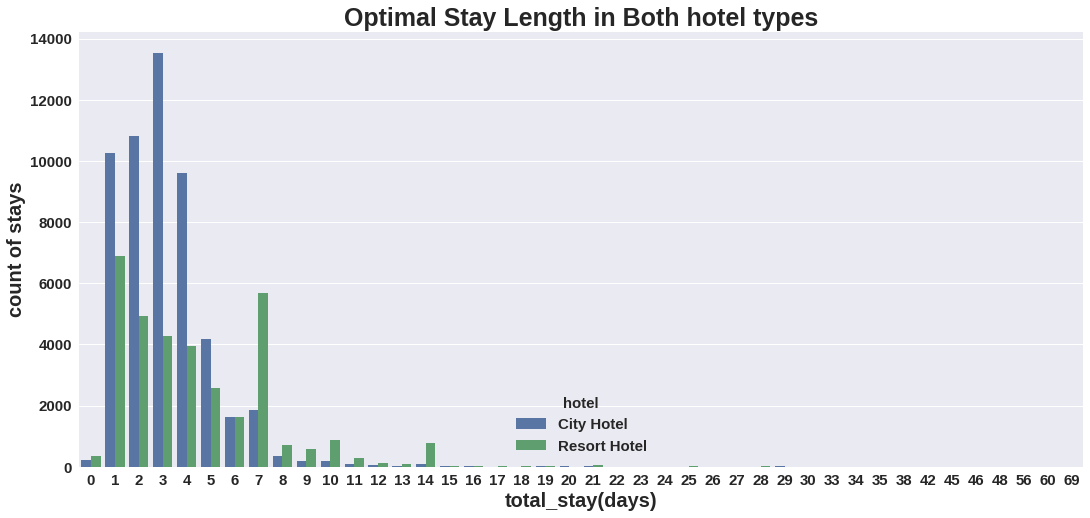

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot( x = stay_length['total_stay'], y = stay_length['number_of_days_stay'],hue = stay_length['hotel'])
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

### **Observation:**
Optimal stay in both the type hotel is less than 7 days.

#13)Relationship between ADR and total stay.

In [ ]:
adr_total_stay = df1.groupby(['adr','total_stay','hotel']).agg('count').reset_index()
adr_total_stay = adr_total_stay.iloc[:,:3]
adr_total_stay = adr_total_stay.rename(columns={'is_canceled':'Number of stays'})
adr_total_stay

,adr,total_stay,hotel
0,-6.38,10,Resort Hotel
1,0.00,0,City Hotel
2,0.00,0,Resort Hotel
3,0.00,1,City Hotel
4,0.00,1,Resort Hotel
...,...,...,...
21987,450.00,14,Resort Hotel
21988,451.50,2,City Hotel
21989,508.00,1,Resort Hotel
21990,510.00,1,City Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

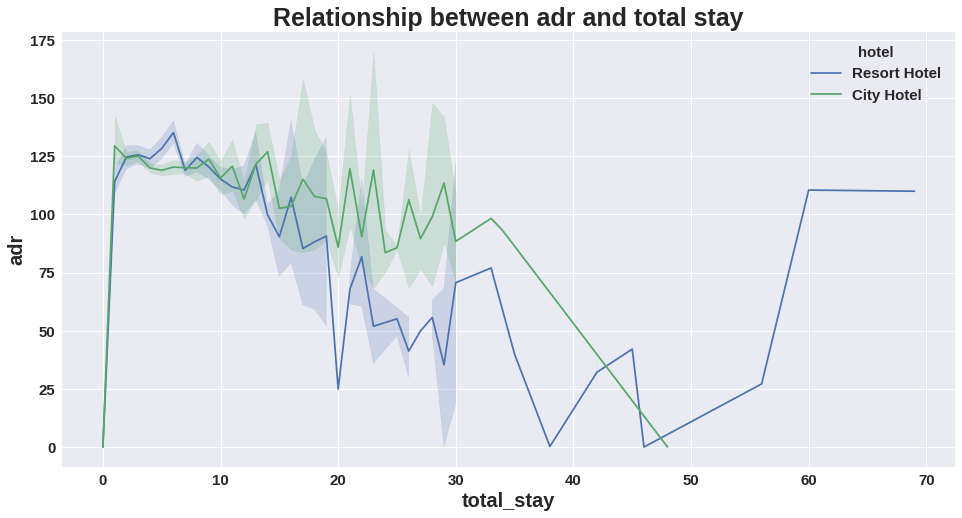

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=adr_total_stay['total_stay'],y=adr_total_stay['adr'],hue = adr_total_stay['hotel'] )
plt.title('Relationship between adr and total stay')

#Correlation of the columns

Text(0.5, 1.0, 'correlation of columns')

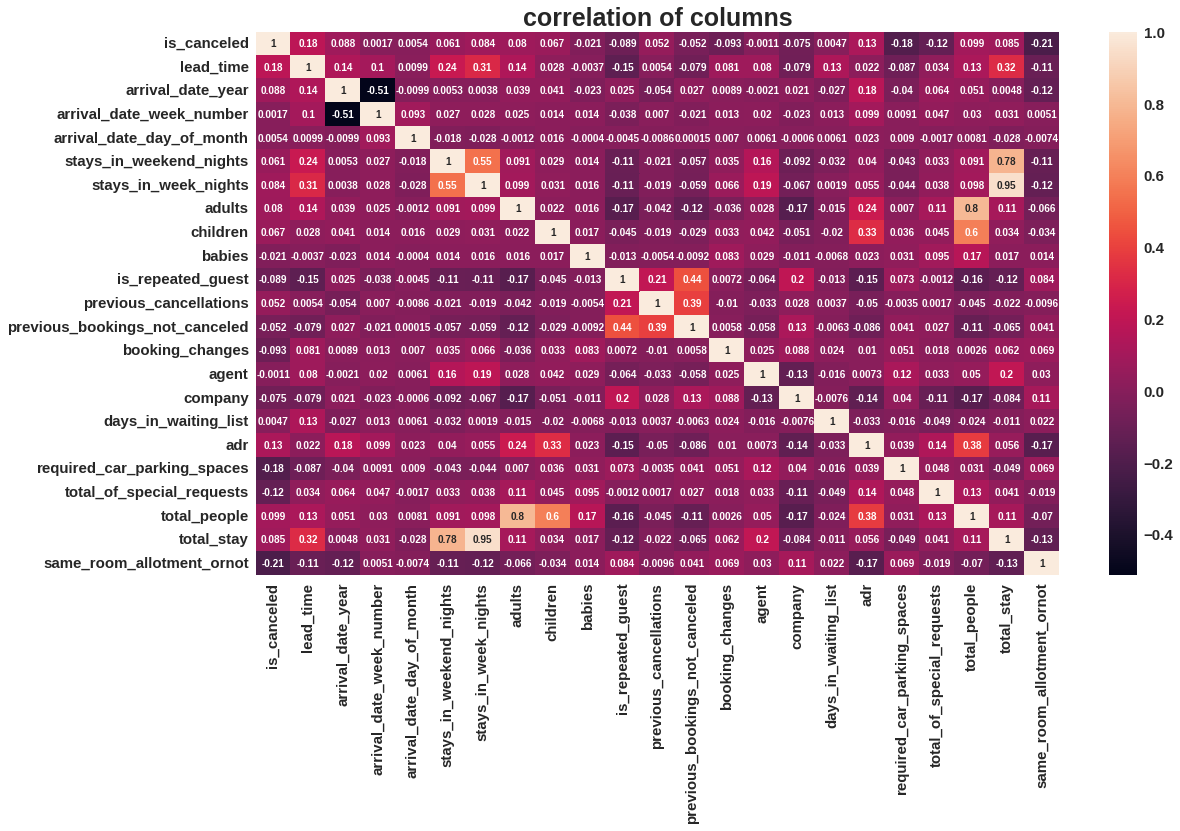

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(df1.corr(),annot = True)
plt.title('correlation of columns')

###1) is_canceled and same_room_alloted_or_not are negatively corelated. That means  customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
###2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
###3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.
###4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.